<a href="https://colab.research.google.com/github/WesleyRichter/Comp-542-H2D/blob/main/TrOCR_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
!pip install keras-ocr -q

In [65]:
import os
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests
import keras_ocr
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import pandas as pd
import numpy as np
from itertools import chain

In [66]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [67]:
# Loads the content of each line into a dic where ID is the key and content
form_file_path = os.path.join('/drive/MyDrive/Comp 542/IAM/ascii', 'lines.txt')
# Load data_lines from the file
with open(form_file_path, 'r') as file:
    data_lines = file.readlines()

In [68]:
# Extracts the line ID and stores it into an array
data_lines = data_lines[23:]
data_IDs = [line.split()[0] for line in data_lines]

# Extracts the content of each line and store it into an array
data_content = []
for line in data_lines:
  # in some lines spaces are included within the content section
  # ex a01-000u-03 content: M Ps|tomorrow|.|Mr.|Michael|Foot|has
  # to account for that we generate a 2d list
  # first dimension being indexes 8 and beyond (if any)
  # second dimension being the content of those indexes
  # ex a01-000u-03 content -> [['M'],['Ps','tomorrow','.','Mr.','Michael','Foot','has']]
  # this 2d list is flatten into a 1d list and added to the end of data_content
  # ex [['M'],['Ps','tomorrow','.','Mr.','Michael','Foot','has']] -> ['M','Ps','tomorrow','.','Mr.','Michael','Foot','has']
  content = [entry.split('|') for entry in line.split()[8:]]
  data_content.append(list(chain.from_iterable(content)))

# Using data_IDs and data_content to create a dic with the id as the keys
lines_data_dic = {line_ID: content_arr for line_ID,content_arr in zip(data_IDs,data_content)}

# Lastly with the lines_data_dic, another dic is created with respect to the form/whole page content
# Key is the form_id, the values are 2d list with first dimension being each line and the second being its content.
form_data_dic = {line.split()[0][:-3]:[] for line in data_lines}
for key in lines_data_dic.keys():
  form_data_dic[key[:-3]].append(lines_data_dic[key])

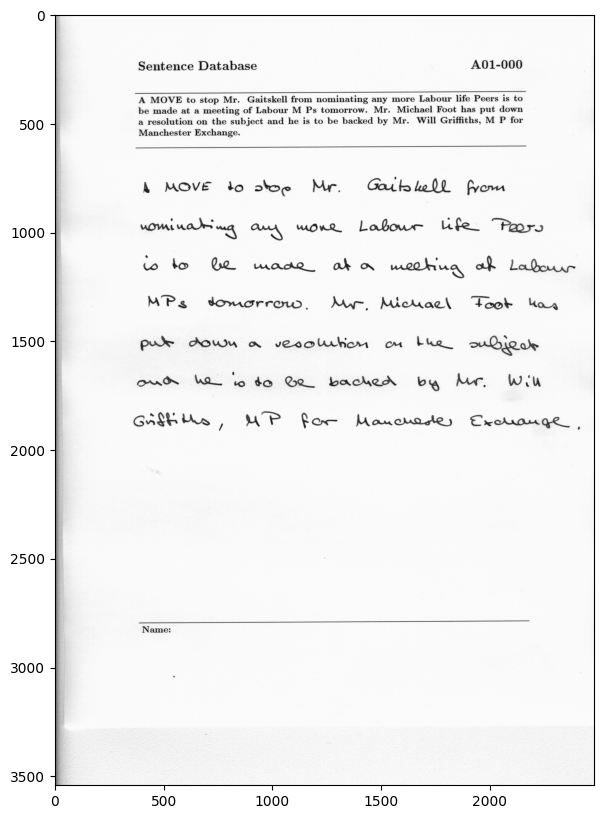

In [69]:
#this section creates a file path to a given form ID assuming you are using the IAM files with the shared google folder
image_id = 'a01-000u'
if(image_id[0] in 'abcd'):
  folder_name = 'formsA-D(1)'
elif (image_id[0] in 'efgh'):
  folder_name = 'formsE-H(1)'
else:
  folder_name = 'formsI-Z(1)'

#This loads the image as an image object
form_image_path = os.path.join(f'/drive/MyDrive/Comp 542/IAM/{folder_name}/{image_id}.png')
image = Image.open(form_image_path).convert("RGB")

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image)

In [70]:
# this creates a text detector object from keras_ocr
text_detector = keras_ocr.detection.Detector()
# generates a list holding an 3d dimensional array
# 3d array structure:
#   1st dimension bounding boxes
#   2nd dimension coordinates points for the corners of each box
#   3rd dimension are x & y values
# total execution time is roughly 120 seconds or so
results = text_detector.detect([form_image_path],link_threshold=0.4)
print(results)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 187s 187s/step
[array([[[1922.     ,  204.     ],
        [2158.     ,  204.     ],
        [2158.     ,  252.     ],
        [1922.     ,  252.     ]],

       [[ 384.     ,  210.     ],
        [ 642.     ,  210.     ],
        [ 642.     ,  262.     ],
        [ 384.     ,  262.     ]],

       [[ 660.     ,  210.     ],
        [ 934.     ,  210.     ],
        [ 934.     ,  260.     ],
        [ 660.     ,  260.     ]],

       [[1844.     ,  366.     ],
        [1914.     ,  366.     ],
        [1914.     ,  402.     ],
        [1844.     ,  402.     ]],

       [[1930.     ,  368.     ],
        [2044.     ,  368.     ],
        [2044.     ,  402.     ],
        [1930.     ,  402.     ]],

       [[ 885.6184 ,  370.1422 ],
        [1071.8848 ,  367.59064],
        [1072.4236 ,  406.92572],
        [ 886.1572 ,  409.4773 ]],

       [[1202.5494 ,  362.58157],
        [1444.9779 ,  369.44278],
        [1443.754

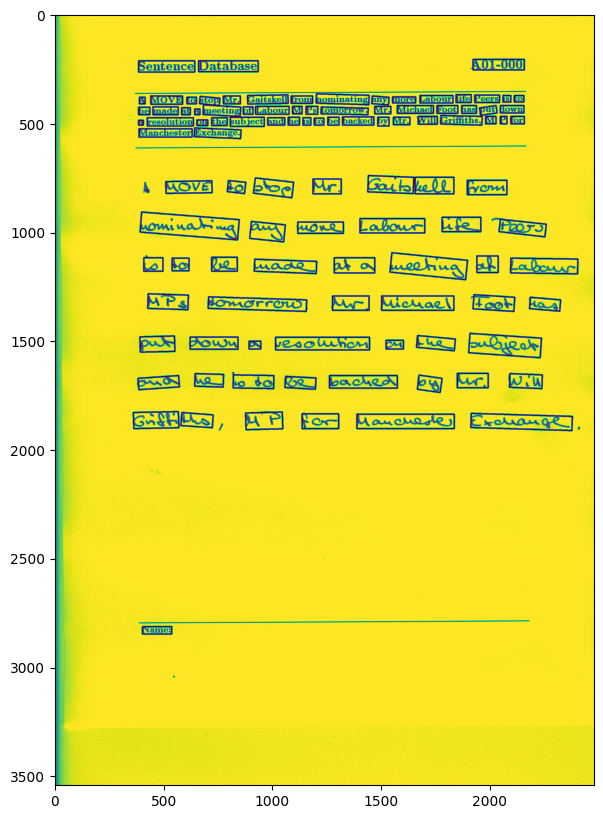

In [75]:

boxes = results[0]
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(keras_ocr.tools.drawBoxes(plt.imread(form_image_path,format= 'png'), boxes,color=(0, 0, 0)))
plt.show()

[[[1922.       204.     ]
  [2158.       204.     ]
  [2158.       252.     ]
  [1922.       252.     ]]

 [[ 384.       210.     ]
  [ 642.       210.     ]
  [ 642.       262.     ]
  [ 384.       262.     ]]

 [[ 660.       210.     ]
  [ 934.       210.     ]
  [ 934.       260.     ]
  [ 660.       260.     ]]

 [[1844.       366.     ]
  [1914.       366.     ]
  [1914.       402.     ]
  [1844.       402.     ]]

 [[1930.       368.     ]
  [2044.       368.     ]
  [2044.       402.     ]
  [1930.       402.     ]]

 [[ 885.6184   370.1422 ]
  [1071.8848   367.59064]
  [1072.4236   406.92572]
  [ 886.1572   409.4773 ]]

 [[1202.5494   362.58157]
  [1444.9779   369.44278]
  [1443.7545   412.67227]
  [1201.326    405.81107]]

 [[1678.       370.     ]
  [1830.       370.     ]
  [1830.       404.     ]
  [1678.       404.     ]]

 [[2060.       370.     ]
  [2096.       370.     ]
  [2096.       400.     ]
  [2060.       400.     ]]

 [[2112.       370.     ]
  [2156.       370. 

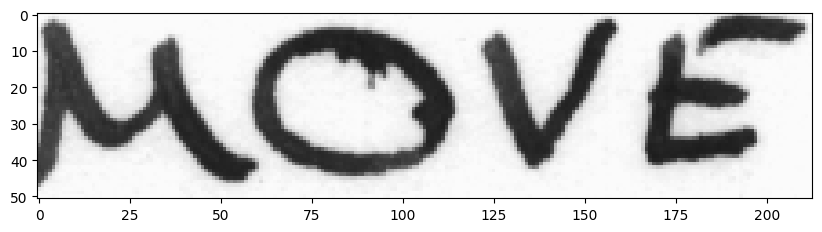

In [77]:
# creates a 2d list holding the top left and bottom right cooridates for each box
# 2d list structure:
#   1st dimension bounding boxes
#   2nd dimension coordinates points top_left_x, top_left_y, bottom_right_x, bottom_right_y
imagesCorners = [[int(box[0][0]),int(box[0][1]),int(box[2][0]),int(box[2][1])] for box in boxes]

# creates a list of cropped images of each bounding box
images = [image.crop((box[0],box[1],box[2],box[3])) for box in imagesCorners]
fig, ax = plt.subplots(figsize=(10, 10))

ax.imshow(images[59])

In [78]:
# this loads the pretrained trocr model
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.46.2"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder

In [79]:
# feeds each cropped image into the transformer and stores its output into a list: results
results =[]
for img in images:
  pixel_values = processor(images=img, return_tensors="pt").pixel_values
  generated_ids = model.generate(pixel_values)
  generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
  results.append(generated_text)
print(results)
#print(f'ground truth for id {image_id}: {data_dic[image_id]}')


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


['a01-000', 'sentence', 'database .', 'life .', 'peers', 'gaitskell', 'nominating', 'Labour .', 'is', 'to', 'from', 'molve', 'mr.', 'any', 'more', 'a', 'to', 'stop', 'down', 'michael', 'foot', 'has', 'mir.', 'put', 'meeting', 'of', 'labour', 'lvi', 'ps', 'made', 'tomorrow .', 'be', 'at', 'a', 'p.', 'for', 'will', 'griffiths ,', 'lvi', 'backed', 'mir.', 'subject', 'and', 'he', 'is', 'be', 'by', 'resolution', 'the', 'to', 'on', 'a', 'exchange .', 'Manchester', 'gaints', 'kell', 'mr.', 'stop', 'from', 'move', 'to', 'nominating', 'life .', 'labour', 'peers', 'mone', 'any', 'af', 'lee', 'is', 'to', 'at a', 'meeting', 'labour', 'made', 'MPs', 'foot', 'mr.', 'michael', 'tomorrow .', 'kas', 'subject', 'the', 'put', 'dongy', 'resolution .', 'cm.', 'od', 'mur .', 'he', 'will', 'to do', 'backed', 'aud', 'be', 'by', 'griffi', 'm.p', 'khs', 'for', 'manchester .', 'exchange .', 'name :']


move


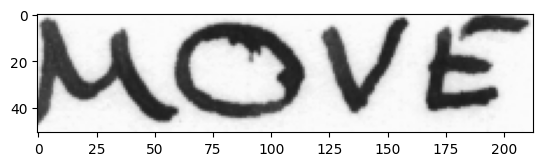

In [80]:
# the first 53 indexes in results include the typed prompt at the top of the form
# The detector reads the pager top down so word order is scrambled within it being order in highest bounding box

fig, ax = plt.subplots()
ax.imshow(images[59])
print(results[59])